In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)

In [12]:
b_img.shape, a_img.shape

((461, 697, 3), (461, 697, 3))

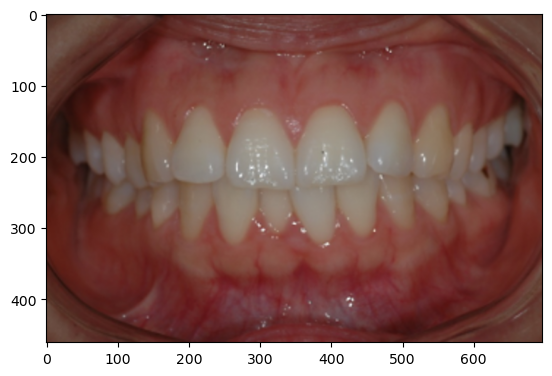

In [10]:
plt.imshow(b_img)
plt.show()

### 헤리스 코너 검출 (Harris Corner Detection)
- 특징점 으로 좌표(x,y)를 찾음
- 장점: 엣지를 잘 찾기 때문에 매칭점으로 탁월하다
- > 단점: 각각의 이미지에서 일치하는 특징점을 찾지 못할 수도 있다.


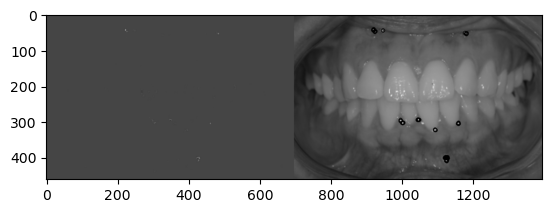

In [66]:
import cv2
import numpy as np

b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출 ---①
corner = cv2.cornerHarris(b_img, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기 ---③
for x, y in coord:
    cv2.circle(b_img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
b_img = cv2.cvtColor(b_img, cv2.COLOR_GRAY2BGR)
merged_b = np.hstack((corner_norm, b_img))

plt.imshow(merged_b)
plt.show()

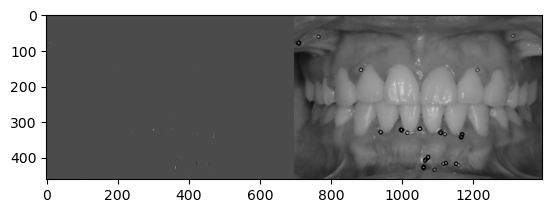

In [67]:
import cv2
import numpy as np

a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출 ---①
corner = cv2.cornerHarris(a_img, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그리미 그리기 ---③
for x, y in coord:
    cv2.circle(a_img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
a_img = cv2.cvtColor(a_img, cv2.COLOR_GRAY2BGR)
merged_a = np.hstack((corner_norm, a_img))

plt.imshow(merged_a)
plt.show()

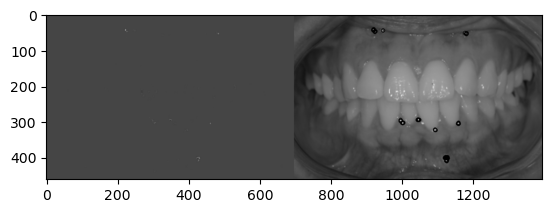

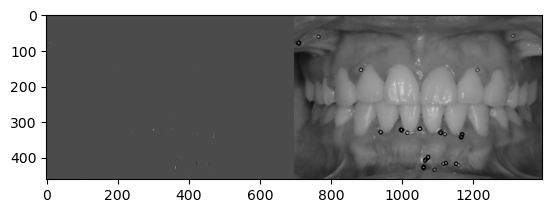

In [73]:
plt.imshow(merged_b)
plt.show()

plt.imshow(merged_a)
plt.show()

### 특징점 검출기
- 좌표(x,y) 외에도 다양한 특징점을 찾을 수 있음

### FAST(Feature from Accelerated Segment Test) Detector
: 점 p를 중심으로 원을 그려 --> 주위 픽셀 n개가 연속될 경우 p를 특징점으로 판단함
- 미분을 하지 않아 속도가 빠름
- > 단점: 각각의 이미지에서 일치하는 특징점을 찾지 못할 수도 있다.

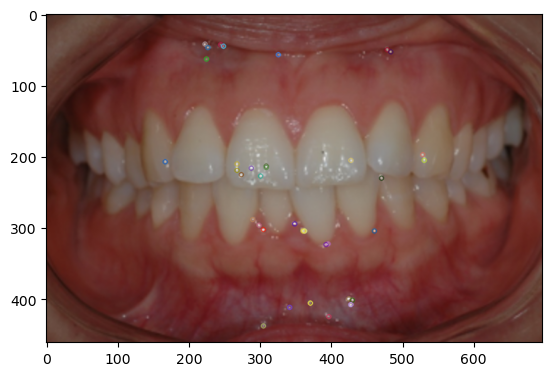

In [85]:
# FAST로 특징점 검출 (kpt_fast.py)

b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b_img_gray = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)

# FASt 특징 검출기 생성 ---①
fast = cv2.FastFeatureDetector_create(50)
# 특징점 검출 ---②
keypoints = fast.detect(b_img_gray, None)
# 특징점 그리기 ---③
b_img = cv2.drawKeypoints(b_img, keypoints, None)
b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2RGB)
# 결과 출력 ---④
plt.imshow(b_img)
plt.show()

### SimpleBlobDetector
: 자잘한 객체는 노이즈로 여기고, 특정 크기 이상의 객체만 찾아내는 검출기
- 장점: 큰 치아를 잘 찾아냄 (좋은 특징)
> \+ 큰 치아를 중심으로 정합할 수 있을 것 같음
- 단점: 생각보다 치아 외의 객체(노이즈)를 많이 검출함
>  \- 보완: 히스토그램을 기반으로 치아(흰색) 객체만 분류할 수 있음

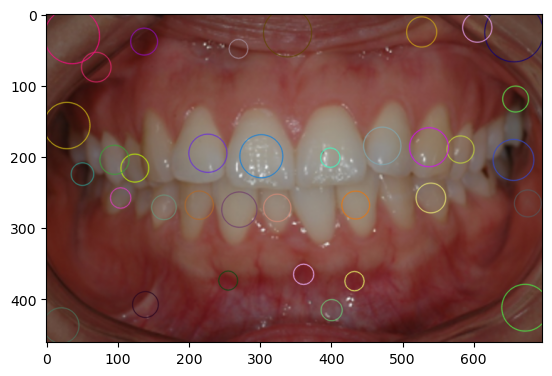

In [84]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b_img_gray = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)

# blob 검출 필터 파라미터 생성 ---①
params = cv2.SimpleBlobDetector_Params()

# 경계값 조정 ---②
params.minThreshold = 10
params.maxThreshold = 240
params.thresholdStep = 5
# 면적 필터 켜고 최소 값 지정 ---③
params.filterByArea = True
params.minArea = 200
  
# 컬러, 볼록 비율, 원형비율 필터 옵션 끄기 ---④
params.filterByColor = False
params.filterByConvexity = False
params.filterByInertia = False
params.filterByCircularity = False 

# 필터 파라미터로 blob 검출기 생성 ---⑤
detector = cv2.SimpleBlobDetector_create(params)
# 키 포인트 검출 ---⑥
keypoints = detector.detect(b_img_gray)
# 키 포인트 그리기 ---⑦
img_draw = cv2.drawKeypoints(b_img, keypoints, None, None,\
                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()